In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys  
sys.path.append("/Users/caihao/PycharmProjects/insight_project/")
from data.config import raw_data_dir, processed_data_dir, cleaned_data_dir
tweets_dir  = "/Users/caihao/Dropbox/TEMP/tweets/"

In [2]:
# read company info and tweets dataframe.
df = pd.read_csv(processed_data_dir + '/companies_2014_labeled.csv')
df_tweets = pd.read_csv(processed_data_dir + '/company_tweets_stats_all.csv')
print(len(df), len(df_tweets))

df_new = pd.concat([df, df_tweets], axis=1)
df_new.count()

4473 4473


permalink                       4473
name                            4473
homepage_url                    4461
category_list                   4464
market                          4464
funding_total_usd               4473
status                          4374
country_code                    4160
state_code                      2898
region                          4160
city                            4133
funding_rounds                  4473
founded_at                      4242
founded_month                   4240
founded_quarter                 4240
founded_year                    4240
first_funding_at                4473
last_funding_at                 4473
twitter_username                4473
first2last_funding_days         4473
twit_since                      4473
twit_until                      4473
WILL                            3847
days_since_series_a             4473
WHEN                            2329
series_a_date                   4473
preA_timespan                   2670
p

In [3]:
# correlation index of all feature to see the importance of tweets data.
# feature engineering.
df = df_new.dropna(subset=['WILL']).copy()
df['funding_total_usd']
df['status_feature'] = df['status'].map({'closed': 0, 'operating': 1, 'acquired': 2}).fillna(0)
df['country_feature'] = df['country_code'].apply(lambda x: 1 if x=='USA' else 0)
df['age_feature'] = (pd.to_datetime('2014-12-31') - pd.to_datetime(df.founded_at)).dt.days
df['age_feature'] = df['age_feature'].fillna(df['age_feature'].mean())
# df['funding_rounds']
df['days_since_first_funding'] = (pd.to_datetime('2014-12-31') - pd.to_datetime(df.first_funding_at)).dt.days
# df['days_since_last_funding'] = (pd.to_datetime('2014-12-31') - pd.to_datetime(df.last_funding_at)).dt.days
df['all_tweet_num'] = df['all_tweet_num'].fillna(0)
df['preA_tweet_num'] = df['preA_tweet_num'].fillna(0)
df['postA_tweet_num'] = df['postA_tweet_num'].fillna(0)
df['preA_tweet_freq'] = df['preA_tweet_freq'].fillna(0)
df['postA_tweet_freq'] = df['postA_tweet_freq'].fillna(0)
df['preA_tweet_avglength'] = df['preA_tweet_avglength'].fillna(0)
df['postA_tweet_avglength'] = df['postA_tweet_avglength'].fillna(0)
df['preA_tweet_content_richness'] = df['preA_tweet_content_richness'].fillna(0)
df['postA_tweet_content_richness'] = df['postA_tweet_content_richness'].fillna(0)
df['preA_tweet_interactiveness'] = df['preA_tweet_interactiveness'].fillna(0)
df['postA_tweet_interactiveness'] = df['postA_tweet_interactiveness'].fillna(0)
df['WILL'] = df['WILL'].astype(int)
df_corr = df[['funding_total_usd', 'status_feature', 'country_feature', 'age_feature', \
              'days_since_first_funding', 'all_tweet_num', 'preA_tweet_num', 'postA_tweet_num', \
              'preA_tweet_freq', 'postA_tweet_freq', 'preA_tweet_avglength', 'postA_tweet_avglength', \
              'preA_tweet_content_richness', 'postA_tweet_content_richness', 'preA_tweet_interactiveness', \
              'postA_tweet_interactiveness', 'WILL']].copy()
df_corr.count()
df_corr.values[:10, :]

array([[4.38110000e+04, 1.00000000e+00, 0.00000000e+00, 1.95300000e+03,
        2.07000000e+03, 5.51000000e+02, 0.00000000e+00, 5.51000000e+02,
        0.00000000e+00, 7.50389105e+00, 0.00000000e+00, 1.13822142e+02,
        0.00000000e+00, 1.45190563e-01, 0.00000000e+00, 3.72050817e-01,
        1.00000000e+00],
       [2.80000000e+06, 1.00000000e+00, 1.00000000e+00, 2.67800000e+03,
        1.91700000e+03, 3.47300000e+03, 3.03000000e+02, 3.17000000e+03,
        5.81095890e+00, 3.32185629e+01, 1.08669967e+02, 1.15986435e+02,
        1.98019802e-02, 7.72870662e-02, 2.21122112e-01, 1.13848580e+00,
        1.00000000e+00],
       [3.83000000e+05, 1.00000000e+00, 0.00000000e+00, 1.64400000e+03,
        1.73500000e+03, 2.94000000e+02, 0.00000000e+00, 2.94000000e+02,
        0.00000000e+00, 1.59906760e+00, 0.00000000e+00, 1.00496599e+02,
        0.00000000e+00, 9.42176871e-01, 0.00000000e+00, 7.48299320e-02,
        1.00000000e+00],
       [3.34570000e+04, 1.00000000e+00, 0.00000000e+00, 1.825

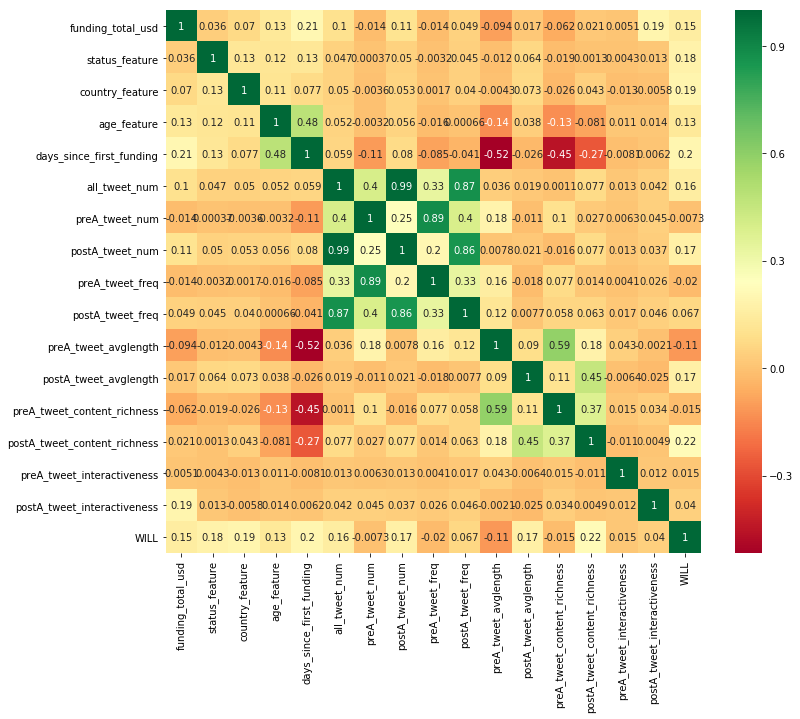

In [4]:
import numpy as np
import seaborn as sns

#get correlations of each features in dataset
plt.figure(figsize=(12, 10))
g=sns.heatmap(df_corr.corr(),annot=True,cmap="RdYlGn")

We see that tweet features are quite important among all features. Next I want to define more features based on their tweet content.

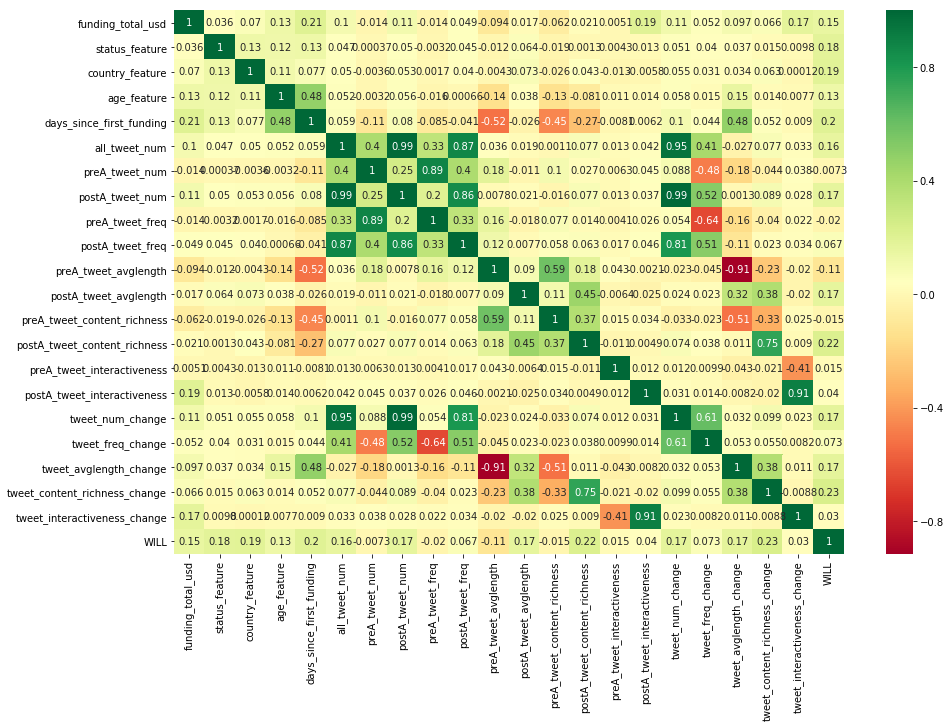

In [5]:
# more numerical features based on pre-/post- series A tweet difference.
df['tweet_num_change'] = df['postA_tweet_num'] - df['preA_tweet_num']
df['tweet_freq_change'] = df['postA_tweet_freq'] - df['preA_tweet_freq']
df['tweet_avglength_change'] = df['postA_tweet_avglength'] - df['preA_tweet_avglength']
df['tweet_content_richness_change'] = df['postA_tweet_content_richness'] - df['preA_tweet_content_richness']
df['tweet_interactiveness_change'] = df['postA_tweet_interactiveness'] - df['preA_tweet_interactiveness']
df['WILL'] = df['WILL'].astype(int)
df_corr = df[['funding_total_usd', 'status_feature', 'country_feature', 'age_feature', \
              'days_since_first_funding', 'all_tweet_num', 'preA_tweet_num', 'postA_tweet_num', \
              'preA_tweet_freq', 'postA_tweet_freq', 'preA_tweet_avglength', 'postA_tweet_avglength', \
              'preA_tweet_content_richness', 'postA_tweet_content_richness', 'preA_tweet_interactiveness', \
              'postA_tweet_interactiveness', 'tweet_num_change', 'tweet_freq_change', 'tweet_avglength_change', \
              'tweet_content_richness_change', 'tweet_interactiveness_change', 'WILL']].copy()
plt.figure(figsize=(15, 10))
g=sns.heatmap(df_corr.corr(),annot=True,cmap="RdYlGn")

In [6]:
# tweet content features based on category_list and market_list. look at the categories and markets and think of \
# ways to do numerical transformation on them.
import re
import spacy
import pickle
from collections import Counter

def get_categories(df):
    all_categories = []
    for category_list in df.category_list.fillna('|').tolist():
        categories = re.split('\||\+', category_list)
        for category in categories:
            all_categories.append(category)
    return dict(Counter(all_categories))

def get_markets(df):
    all_markets = []
    for market in df.market.fillna('+').tolist():
        markets = re.split('\+', market)
        for market_ in markets:
            all_markets.append(market_)
    return dict(Counter(all_markets))

pos_categories = get_categories(df[df.WILL==1.0])
neg_categories = get_categories(df[df.WILL==0.0])
pos_markets = get_markets(df[df.WILL==1.0])
neg_markets = get_markets(df[df.WILL==0.0])

In [15]:
# save positive and negative counts for category/market.
def get_counts(pos_dict, neg_dict):
    counts = {'key':[], 'positive_count':[], 'negative_count':[], 'total_count':[], 'pos_minus_neg_count':[]}
    for key in set(pos_dict)|set(neg_dict):
        if len(key)>0:
            if key in pos_dict:
                pos_count = pos_dict[key]
            else:
                pos_count = 0
            if key in neg_dict:
                neg_count = neg_dict[key]
            else:
                neg_count = 0
            counts['key'].append(key)
            counts['positive_count'].append(pos_count)
            counts['negative_count'].append(neg_count)
            counts['total_count'].append(pos_count + neg_count)
            counts['pos_minus_neg_count'].append(pos_count - neg_count)
    counts_df = pd.DataFrame(counts)
    return counts_df

category_counts = get_counts(pos_categories, neg_categories)\
                    .sort_values(by=['pos_minus_neg_count', 'total_count'], ascending=False)\
                    .reset_index(drop=True)

market_counts = get_counts(pos_markets, neg_markets)\
                    .sort_values(by=['pos_minus_neg_count', 'total_count'], ascending=False)\
                    .reset_index(drop=True)

# category_counts.to_csv(processed_data_dir + '/category_counts.csv', index=False)
# market_counts.to_csv(processed_data_dir + '/market_counts.csv', index=False)
category_counts = pd.read_csv(processed_data_dir + '/category_counts.csv')
market_counts = pd.read_csv(processed_data_dir + '/market_counts.csv')
print(len(category_counts))
print(len(market_counts))

606
447


In [26]:
category_counts.head()

,key,positive_count,negative_count,total_count,pos_minus_neg_count
0,Software,435,214,649,221
1,Enterprise Software,227,95,322,132
2,Mobile,360,235,595,125
3,Advertising,227,122,349,105
4,Analytics,155,53,208,102
